In [1]:
import pandas as pd
import os

# Ruta del archivo
file_path = os.path.join('data', 'processed', 'TMR_COMPILADO.csv')

# Leer el archivo con encoding y separador correcto
df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Ver las columnas originales
print("Columnas originales:")
print(df.columns.tolist())

# Renombrar si existe la columna
if 'Temperature [°C]' in df.columns:
    df = df.rename(columns={'Temperature [°C]': 'Temp'})

# Definir columnas numéricas y no numéricas
numeric_cols_noTLASmax = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temp']
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'Airline (Name)', 'From/To', 'Callsign', 'Aircraft Type']

# Convertir columnas numéricas si existen en el DataFrame
for col in numeric_cols_noTLASmax:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
    else:
        print(f"⚠️ Columna no encontrada: {col}")

# Verificar tipos de datos
print("\nTipos de datos:")
print(df.dtypes)


Columnas originales:
['NMT', 'TLASmax', 'LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temperature [ï¿½C]', 'A/D', 'Runway', 'Flight', 'Airline', 'Airline (Name)', 'From/To', 'Callsign', 'Aircraft Type']
⚠️ Columna no encontrada: Temp

Tipos de datos:
NMT                    object
TLASmax                object
LASmax                float64
SEL                   float64
Leq                   float64
LAZ                   float64
EPNL                  float64
Temperature [ï¿½C]     object
A/D                    object
Runway                 object
Flight                 object
Airline                object
Airline (Name)         object
From/To                object
Callsign               object
Aircraft Type          object
dtype: object


In [2]:
df = df.rename(columns={'Temperature [ï¿½C]': 'Temp'})
df['Temp'] = df['Temp'].astype(str).str.replace(',', '.').astype(float)

In [3]:
print(df.dtypes)

NMT                object
TLASmax            object
LASmax            float64
SEL               float64
Leq               float64
LAZ               float64
EPNL              float64
Temp              float64
A/D                object
Runway             object
Flight             object
Airline            object
Airline (Name)     object
From/To            object
Callsign           object
Aircraft Type      object
dtype: object


In [4]:
# Contar valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")


NMT: 3 valores únicos
TLASmax: 283637 valores únicos
LASmax: 474 valores únicos
SEL: 486 valores únicos
Leq: 425 valores únicos
LAZ: 496 valores únicos
EPNL: 513 valores únicos
Temp: 399 valores únicos
A/D: 2 valores únicos
Runway: 4 valores únicos
Flight: 3139 valores únicos
Airline: 424 valores únicos
Airline (Name): 122 valores únicos
From/To: 254 valores únicos
Callsign: 3139 valores únicos
Aircraft Type: 188 valores únicos


In [5]:
#borramos esta columna porque nos estregaba un dato repetido y ademas habia falta de datos.
df = df.drop('Airline (Name)', axis=1)

In [6]:
# Identificar valores nulos
print(df.isnull().sum())

NMT                   0
TLASmax               0
LASmax                0
SEL                   0
Leq                   0
LAZ                   0
EPNL               3045
Temp                600
A/D              129287
Runway           130088
Flight           129287
Airline          129287
From/To          129287
Callsign         129287
Aircraft Type    129287
dtype: int64


In [7]:
df = df.dropna()
# Identificar valores nulos
print(df.isnull().sum())

NMT              0
TLASmax          0
LASmax           0
SEL              0
Leq              0
LAZ              0
EPNL             0
Temp             0
A/D              0
Runway           0
Flight           0
Airline          0
From/To          0
Callsign         0
Aircraft Type    0
dtype: int64


In [8]:
numeric_cols_noTLASmax = ['LASmax', 'SEL', 'Leq', 'LAZ', 'EPNL', 'Temp']
non_numeric_cols = ['NMT', 'A/D', 'Runway', 'Flight', 'Airline', 'From/To', 'Callsign', 'Aircraft Type']

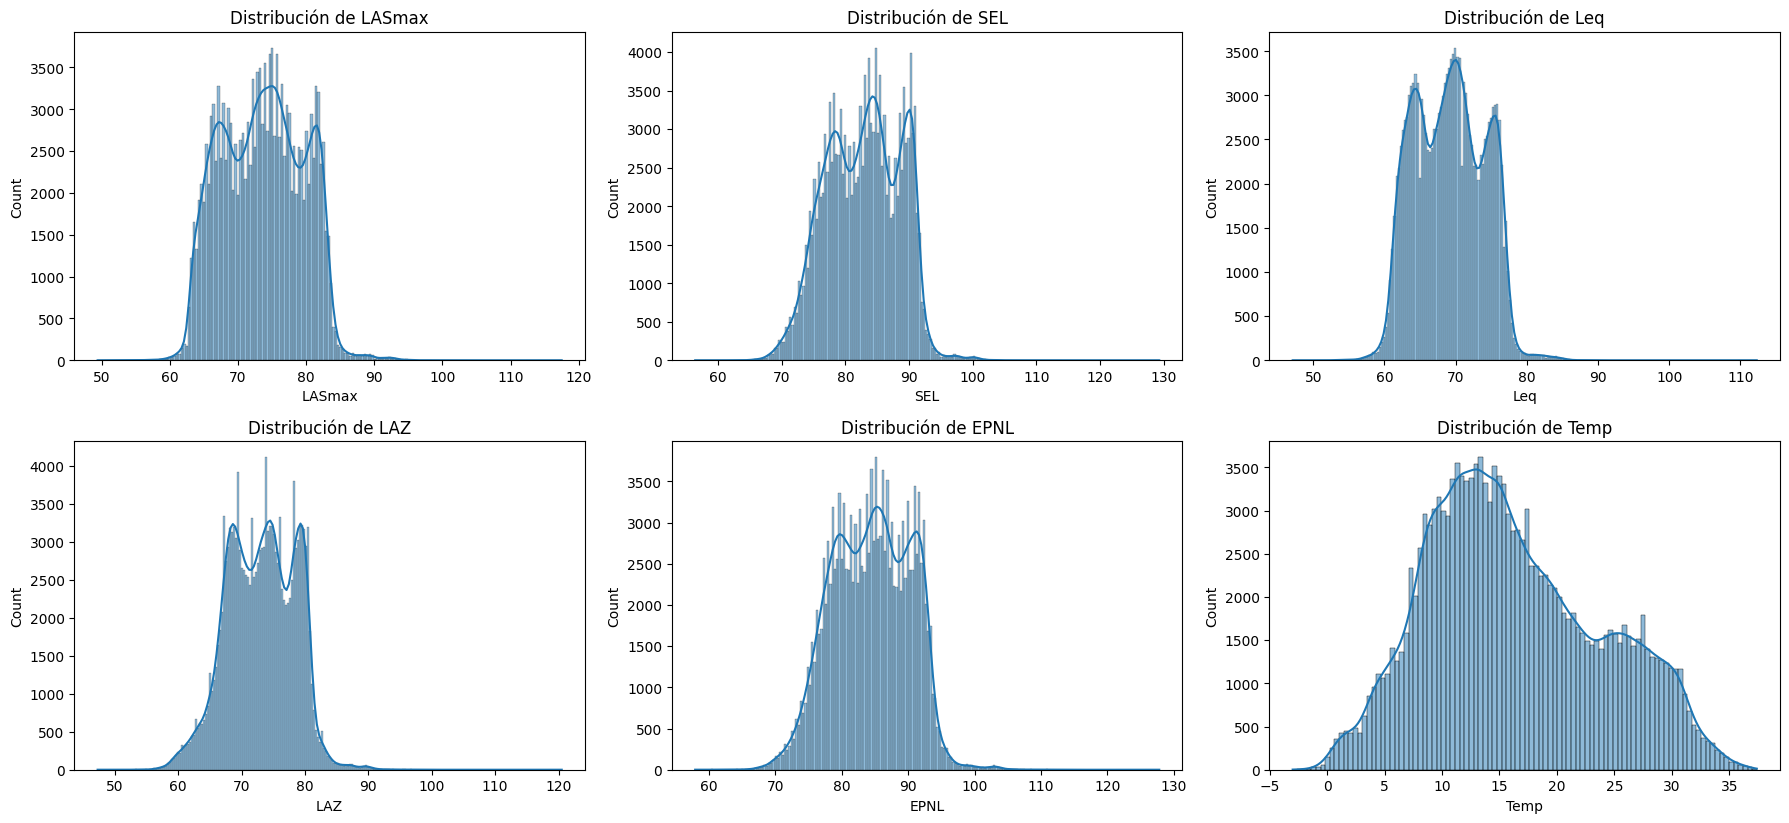

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura con 3 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.tight_layout(pad=5.0)  # Espaciado entre gráficos

# Aplanar la matriz de ejes para recorrer más fácil
axes = axes.flatten()

# Graficar cada variable en su subplot
for idx, col in enumerate(numeric_cols_noTLASmax):
    sns.histplot(df[col], kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribución de {col}')

# Si sobran subplots vacíos (porque hay menos de 9 variables), apagar esos ejes
for i in range(len(numeric_cols_noTLASmax), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


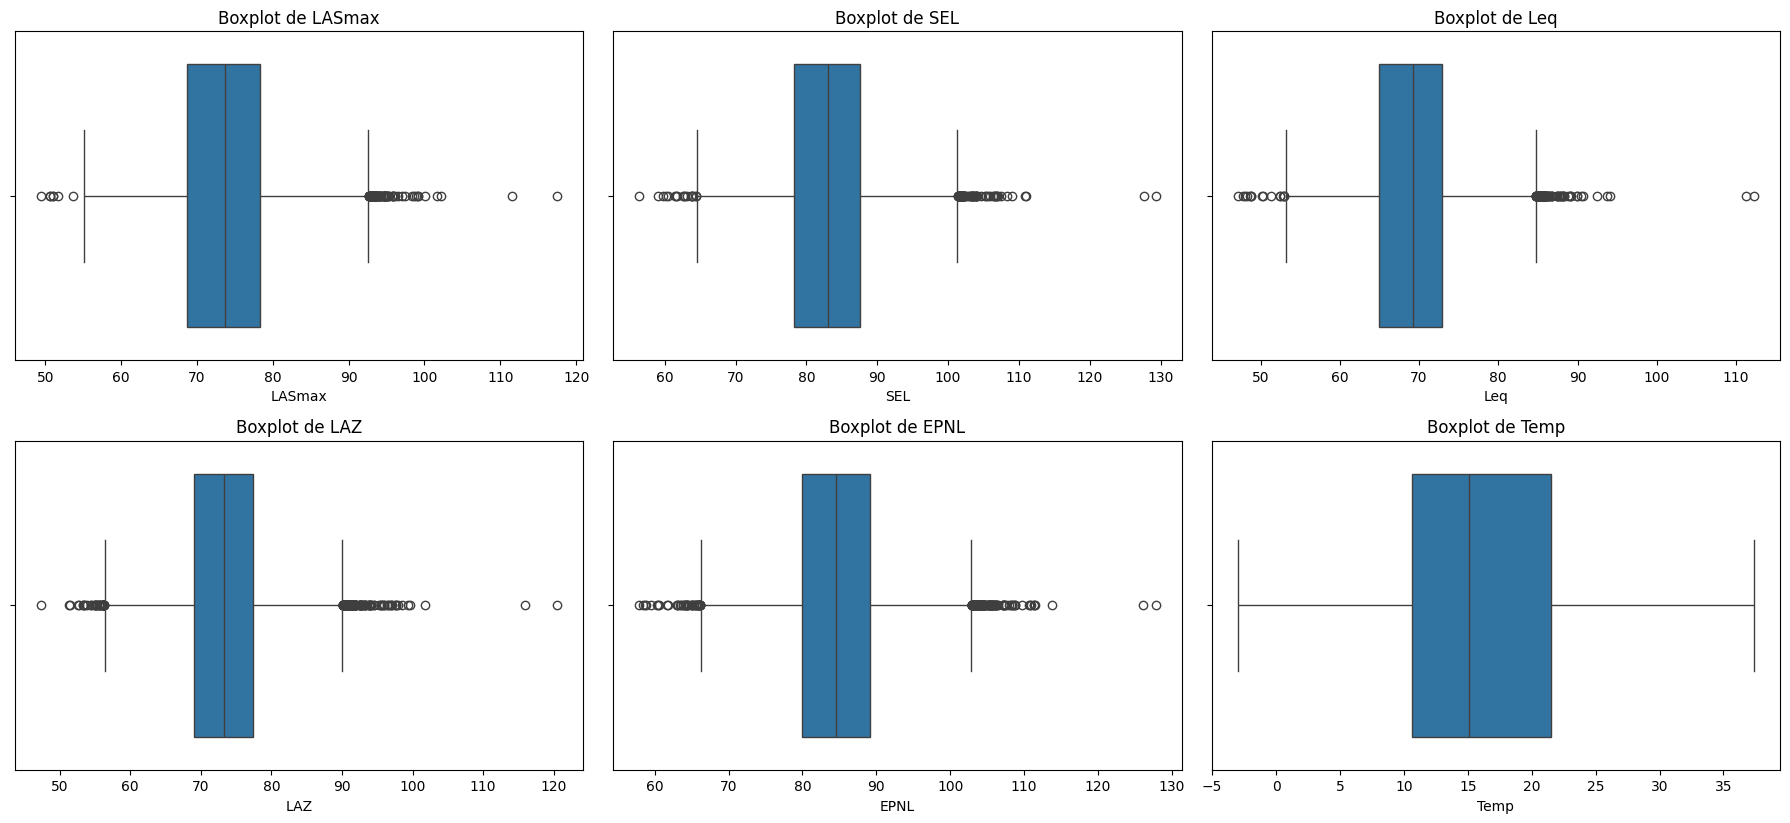

In [10]:
# Crear figura de 3 filas x 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.tight_layout(pad=5.0)  # Espaciado entre gráficos

# Aplanar la matriz de ejes
axes = axes.flatten()

# Graficar cada variable en su subplot
for idx, col in enumerate(numeric_cols_noTLASmax):
    sns.boxplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {col}')

# Si sobran subplots vacíos (porque hay menos de 9 variables), apagar esos ejes
for i in range(len(numeric_cols_noTLASmax), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


Estudio de la variable de LASmax

In [11]:
col = 'LASmax'

Q1 = df[col].quantile(0.25)
Q2 = df[col].quantile(0.50)  # Mediana
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1

lower_whisker = df[col][df[col] >= Q1 - 1.5 * IQR].min()
upper_whisker = df[col][df[col] <= Q3 + 1.5 * IQR].max()

print(f"Análisis de boxplot para '{col}':")
print(f"Q1 (25%): {Q1:.2f}")
print(f"Q2 (Mediana): {Q2:.2f}")
print(f"Q3 (75%): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Bigote inferior (mínimo sin ser outlier): {lower_whisker:.2f}")
print(f"Bigote superior (máximo sin ser outlier): {upper_whisker:.2f}")

Análisis de boxplot para 'LASmax':
Q1 (25%): 68.70
Q2 (Mediana): 73.70
Q3 (75%): 78.30
IQR: 9.60
Bigote inferior (mínimo sin ser outlier): 55.10
Bigote superior (máximo sin ser outlier): 92.60


In [12]:
outlayers_LASmax = df['LASmax'] > 92.60 
outlayers_LASmax.sum()
#df[outlayers_LASmax]
#porcentaje = outlayers_LASmax.mean() * 100
#print(f"{porcentaje:.2f}% de las filas tienen LASmax > 95")

np.int64(107)

In [13]:
outliers_LASmax = df['LASmax'] > 92.6
sensores_outliers = df.loc[outliers_LASmax, df.columns[0]]  # Primera columna es el sensor
print(sensores_outliers.value_counts())

NMT
MP02    84
MP01    22
MP03     1
Name: count, dtype: int64


In [14]:
for col in non_numeric_cols:
    print(f'\nFrecuencias de {col}:\n')
    print(df[col].value_counts())


Frecuencias de NMT:

NMT
MP02    61035
MP03    52612
MP01    39035
Name: count, dtype: int64

Frecuencias de A/D:

A/D
Departure    138024
Arrival       14658
Name: count, dtype: int64

Frecuencias de Runway:

Runway
17L    117622
17R     32573
35R      2355
35L       132
Name: count, dtype: int64

Frecuencias de Flight:

Flight
LAN801     707
AAL912     664
CCACV      662
LNE1446    654
DAL146     650
          ... 
LAN1107      1
LAN93        1
SKU2622      1
ABD4811      1
MOLOT        1
Name: count, Length: 3106, dtype: int64

Frecuencias de Airline:

Airline
LAN    60360
SKU    20318
LXP    16603
JAT    12428
TAM     4519
       ...  
PSR        1
N75        1
KPO        1
N62        1
FWK        1
Name: count, Length: 413, dtype: int64

Frecuencias de From/To:

From/To
SCCF    10763
SCFA     9968
SCTE     9759
SPJC     8603
SBGR     8292
        ...  
MHLM        1
SBSL        1
SCQY        1
SCPG        1
SCVV        1
Name: count, Length: 253, dtype: int64

Frecuencias de Call

C:\Users\claup\AppData\Local\Temp\ipykernel_21576\1369733718.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=order, palette=palette, ax=ax)
C:\Users\claup\AppData\Local\Temp\ipykernel_21576\1369733718.py:15: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.countplot(data=df, x=col, order=order, palette=palette, ax=ax)
C:\Users\claup\AppData\Local\Temp\ipykernel_21576\1369733718.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\claup\AppData\Local\Temp\ipykernel_21576\1369733718.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

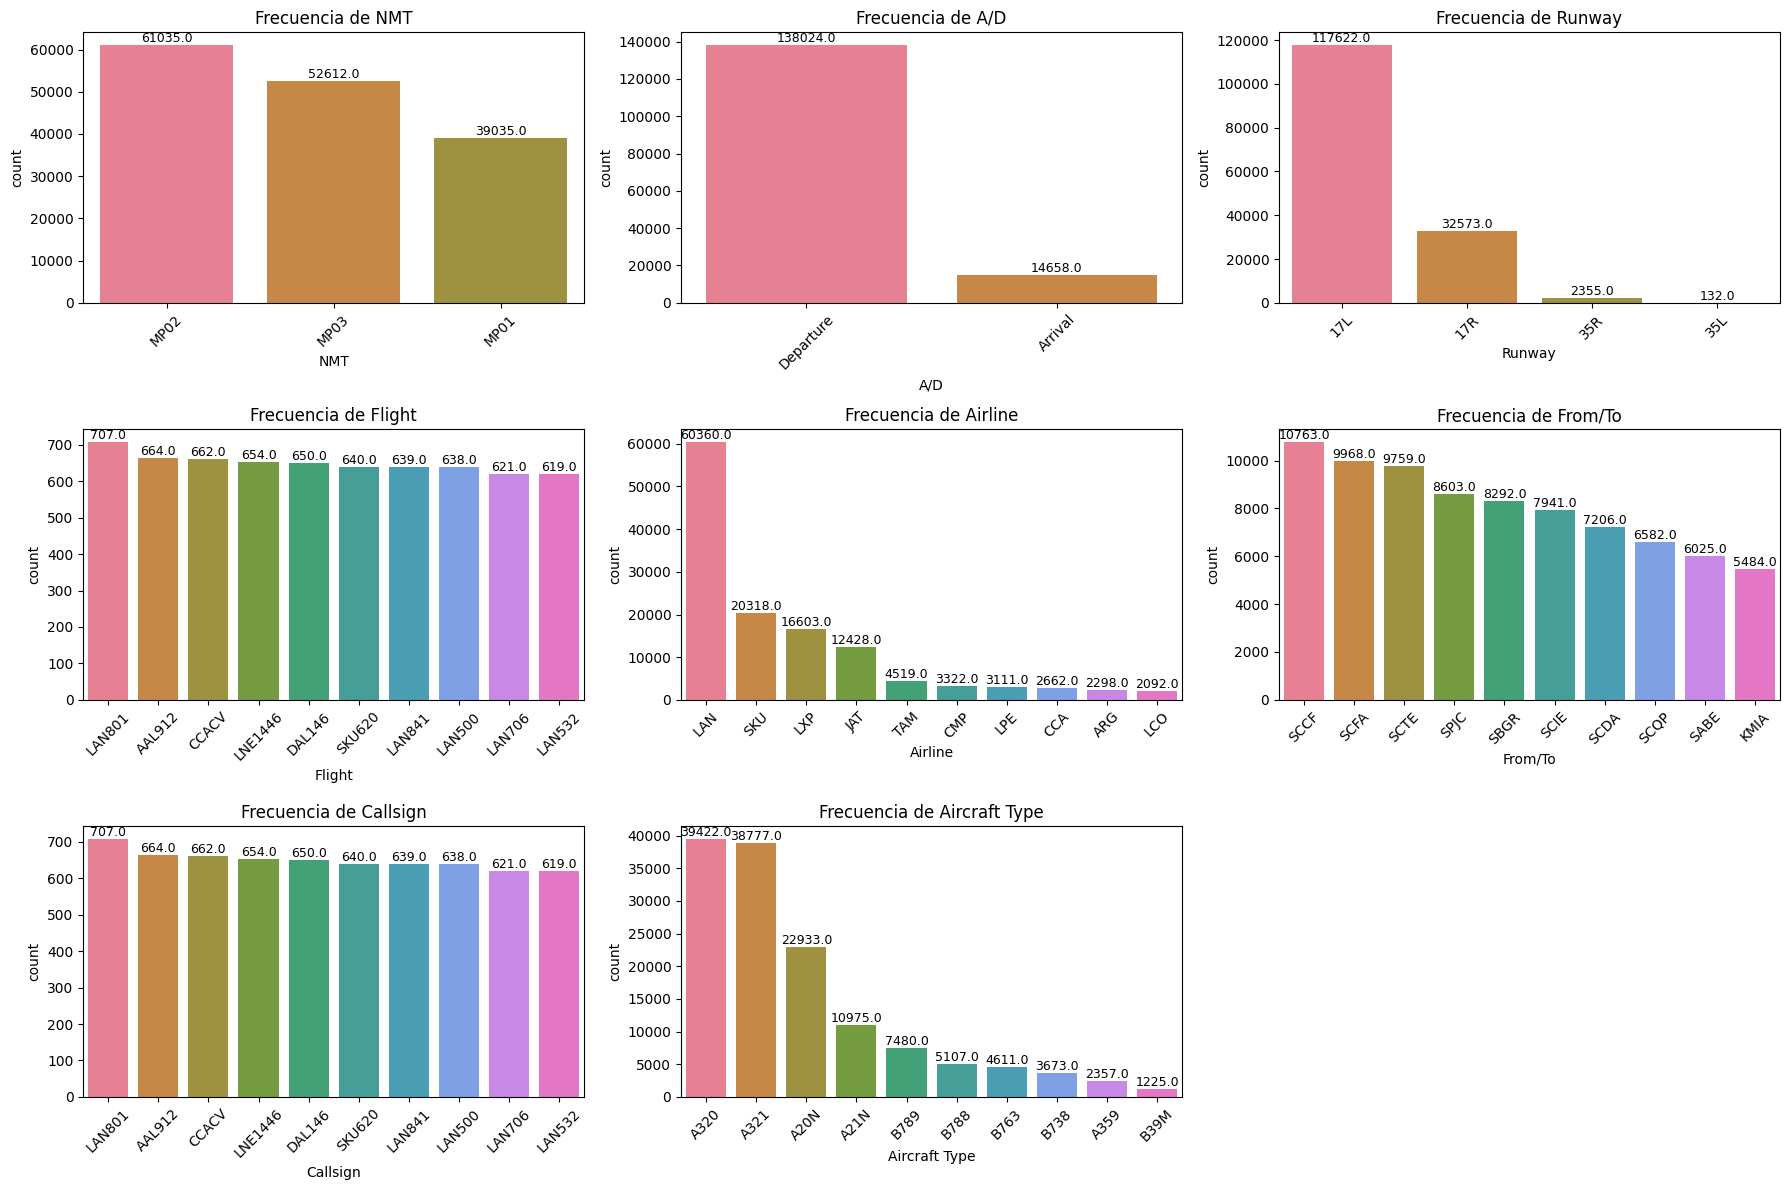

In [15]:
# Paleta de colores intercalados
palette = sns.color_palette("husl", 10)  # 10 colores distintos

# Crear figura de 3 filas x 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.tight_layout(pad=5.0)  # Espaciado entre gráficos

# Aplanar la matriz de ejes
axes = axes.flatten()

# Graficar cada variable categórica en su subplot
for idx, col in enumerate(non_numeric_cols):
    order = df[col].value_counts().index[:10]
    ax = axes[idx]
    sns.countplot(data=df, x=col, order=order, palette=palette, ax=ax)
    ax.set_title(f'Frecuencia de {col}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    # Agregar conteo sobre las barras
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{height}', 
                        (p.get_x() + p.get_width() / 2., height), 
                        ha='center', va='bottom', fontsize=9)

# Si sobran subplots vacíos (porque hay menos de 9 variables), apagar esos ejes
for i in range(len(non_numeric_cols), 9):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

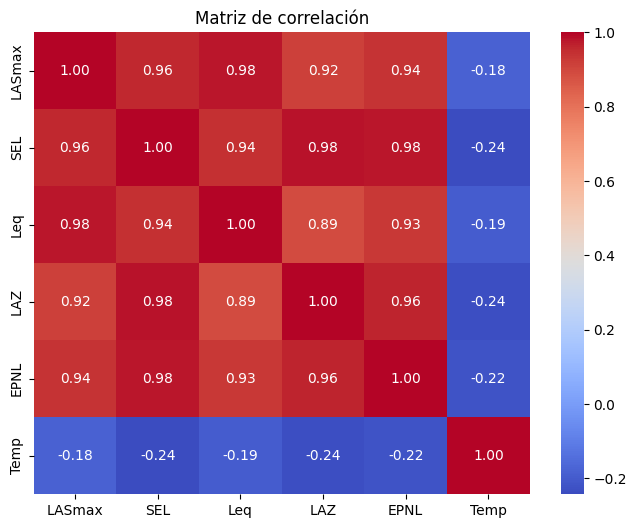

In [16]:
corr = df[numeric_cols_noTLASmax].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

Variables predichas muy correlacionadas, se trabajará con LASmax

C:\Users\claup\AppData\Local\Temp\ipykernel_21576\1127347233.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')


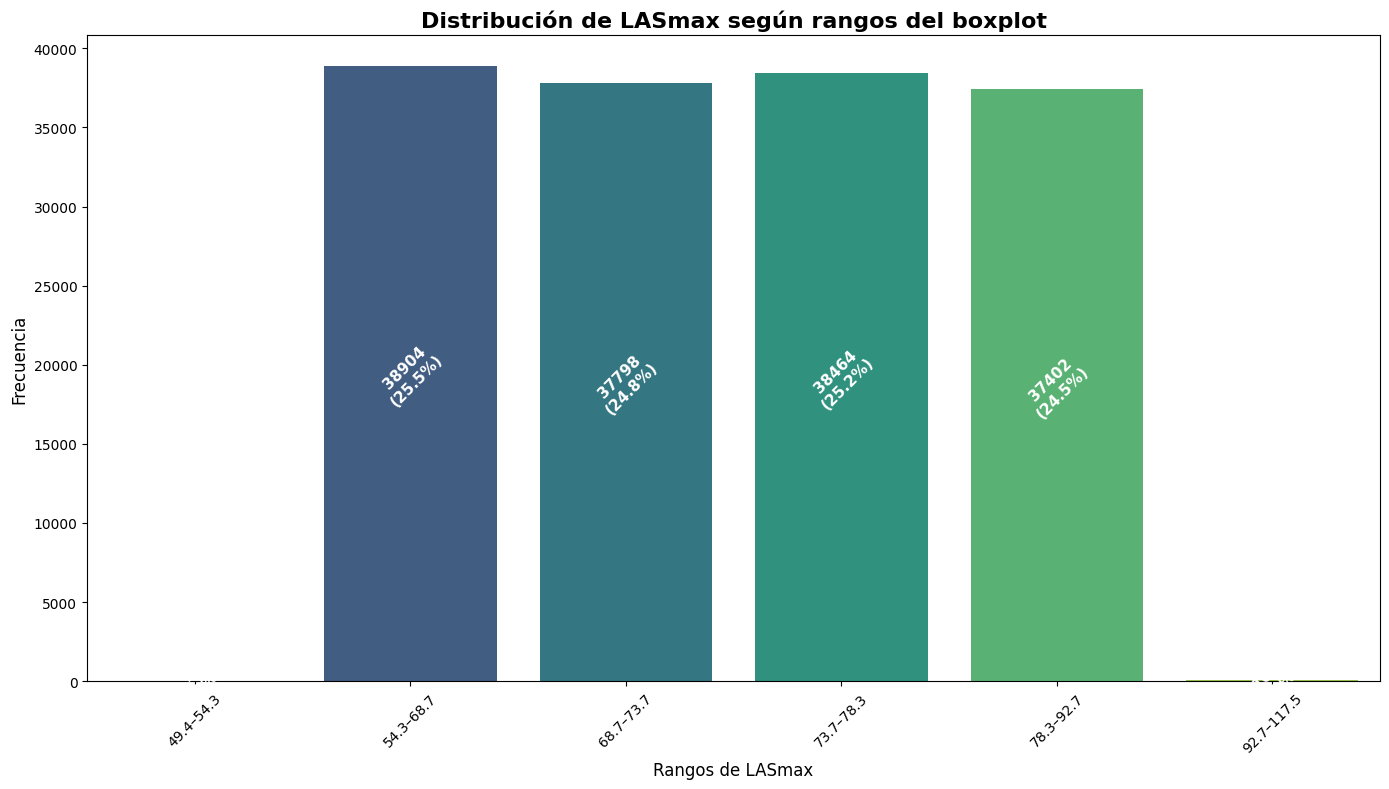

In [17]:
# Calcular valores estadísticos de LASmax
Q1 = df['LASmax'].quantile(0.25)
Q2 = df['LASmax'].quantile(0.50)
Q3 = df['LASmax'].quantile(0.75)
IQR = Q3 - Q1
lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
min_val = 49.40
max_val = 117.50

# Crear los bins y etiquetas en formato numérico
bins = [min_val - 0.1, lower_whisker, Q1, Q2, Q3, upper_whisker, max_val + 0.1]
labels = [
    f'{min_val:.1f}–{lower_whisker:.1f}',
    f'{lower_whisker:.1f}–{Q1:.1f}',
    f'{Q1:.1f}–{Q2:.1f}',
    f'{Q2:.1f}–{Q3:.1f}',
    f'{Q3:.1f}–{upper_whisker:.1f}',
    f'{upper_whisker:.1f}–{max_val:.1f}'
]

# Crear columna con los rangos
df['LASmax_BoxplotRange'] = pd.cut(df['LASmax'], bins=bins, labels=labels, include_lowest=True)

# Contar frecuencia y porcentaje
range_counts = df['LASmax_BoxplotRange'].value_counts().sort_index()
total = range_counts.sum()
percentages = (range_counts / total * 100).round(1)

# Gráfico de barras más grande
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=range_counts.index, y=range_counts.values, palette='viridis')

# Mostrar cantidad + porcentaje dentro de cada barra en diagonal
for i, (count, pct) in enumerate(zip(range_counts.values, percentages.values)):
    ax.text(
        i,                          # posición x
        count * 0.5,                # posición y: a mitad de la barra
        f'{count}\n({pct}%)',       # texto a mostrar
        ha='center',
        va='center',
        fontsize=11,
        rotation=45,
        color='white',
        fontweight='bold'
    )

# Estética
plt.title('Distribución de LASmax según rangos del boxplot', fontsize=16, fontweight='bold')
plt.xlabel('Rangos de LASmax', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

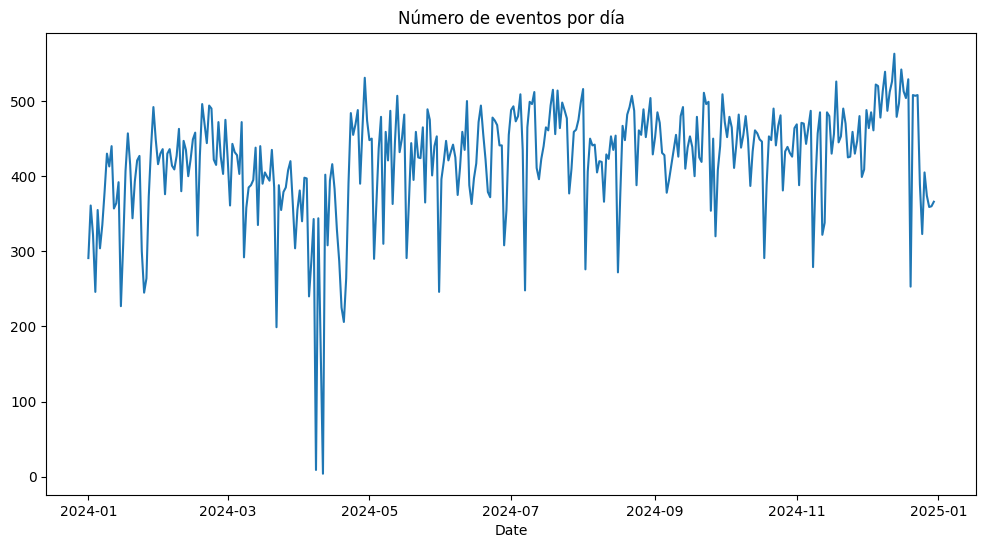

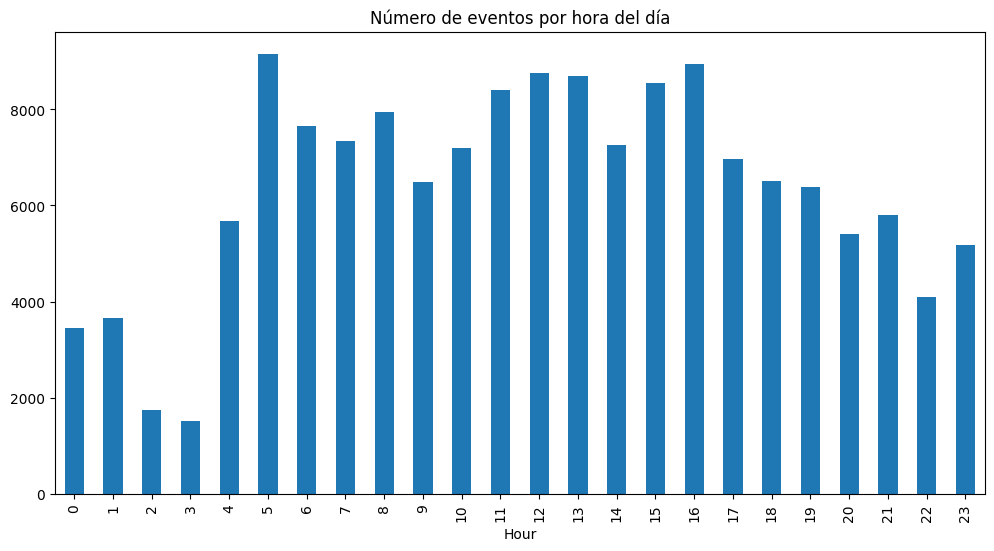

In [18]:
# Convertir Timestamp a tipo datetime
df['TLASmax'] = pd.to_datetime(df['TLASmax'], format='%d/%m/%Y %H:%M:%S')

# Crear columnas adicionales para análisis
df['Date'] = df['TLASmax'].dt.date
df['Hour'] = df['TLASmax'].dt.hour
df['DayOfWeek'] = df['TLASmax'].dt.day_name()

# Gráficos temporales
plt.figure(figsize=(12, 6))
df.groupby('Date').size().plot(kind='line', title='Número de eventos por día')
plt.show()

plt.figure(figsize=(12, 6))
df.groupby('Hour').size().plot(kind='bar', title='Número de eventos por hora del día')
plt.show()

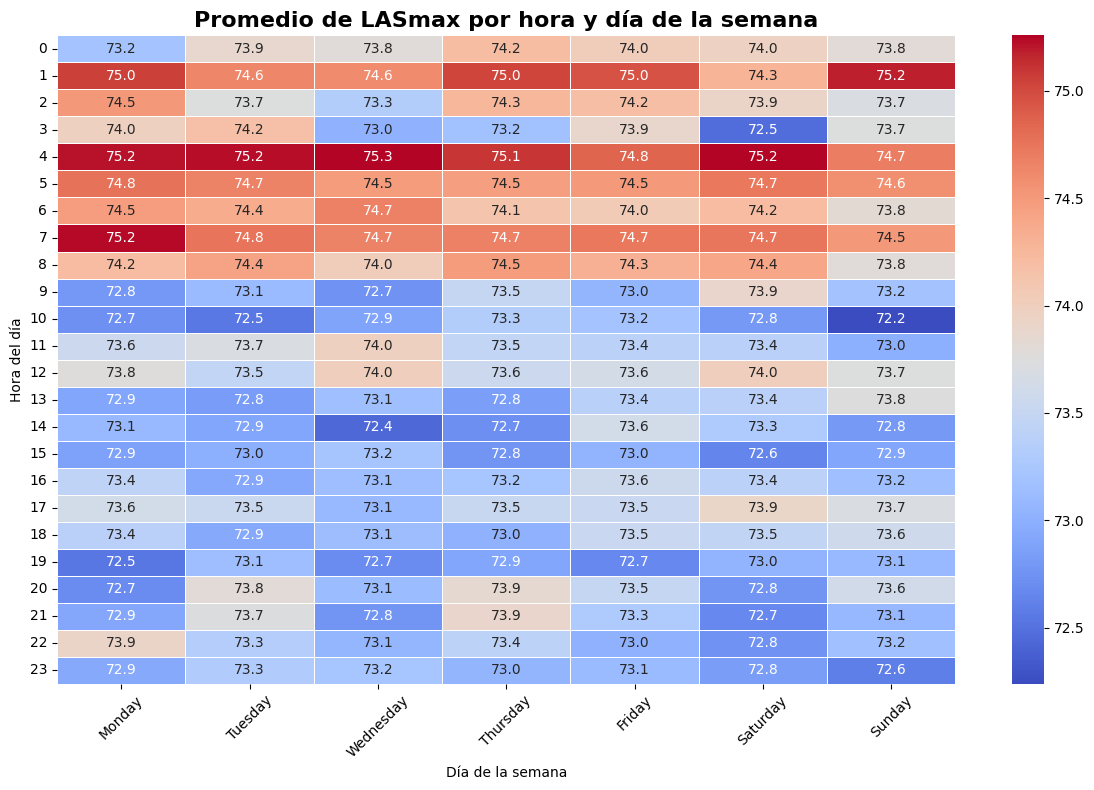

In [19]:
# Ordenar los días de la semana
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Crear tabla dinámica (promedio de LASmax por hora y día)
tabla = df.pivot_table(index='Hour', columns='DayOfWeek', values='LASmax', aggfunc='mean')

# Reordenar columnas por día
tabla = tabla[dias_ordenados]

# Crear heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tabla, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)

plt.title('Promedio de LASmax por hora y día de la semana', fontsize=16, fontweight='bold')
plt.xlabel('Día de la semana')
plt.ylabel('Hora del día')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Ver eventos durante la noche según clasificación de decibeles

C:\Users\claup\AppData\Local\Temp\ipykernel_21576\245140488.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df_noche.groupby(['Hour', 'LASmax_Rango']).size().unstack(fill_value=0)


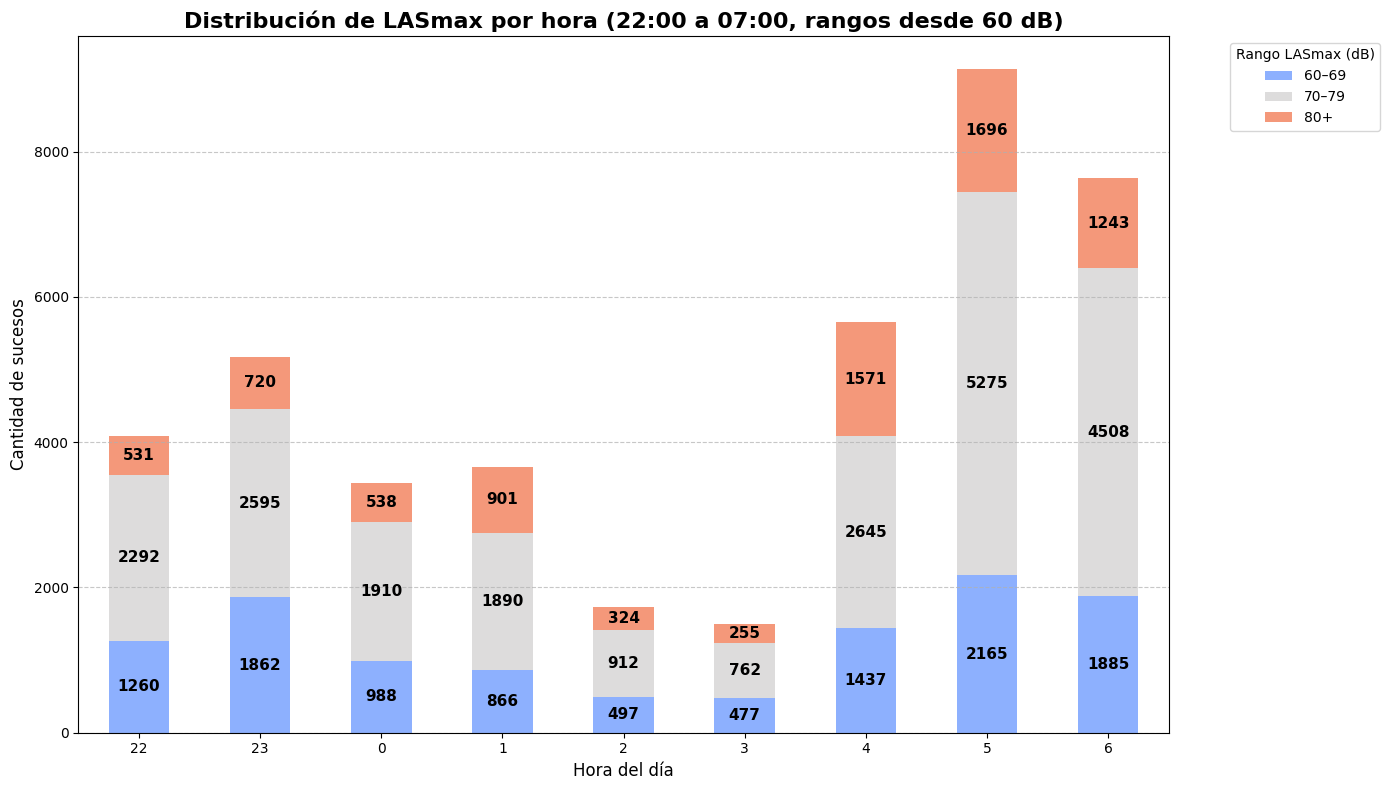

In [20]:
# Condición: entre las 22:00 y 07:00
condicion_hora = (df['Hour'] >= 22) | (df['Hour'] < 7.01)
df_noche = df[condicion_hora].copy()

# Definir nuevos rangos personalizados
bins = [60, 70, 80, df_noche['LASmax'].max() + 1]
labels = ['60–69', '70–79', '80+']

# Crear columna con los nuevos rangos
df_noche['LASmax_Rango'] = pd.cut(df_noche['LASmax'], bins=bins, labels=labels, include_lowest=True)

# Agrupar por hora y rango
conteo = df_noche.groupby(['Hour', 'LASmax_Rango']).size().unstack(fill_value=0)

# Ordenar horas de 22 a 23 y de 0 a 6
horas_ordenadas = list(range(22, 24)) + list(range(0, 7))
conteo = conteo.reindex(horas_ordenadas)

# Paleta de colores más fuerte (azul a rojo)
color_palette = sns.color_palette("coolwarm", n_colors=len(labels)).as_hex()
color_dict = dict(zip(labels, color_palette))

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 8))
bar_container = conteo.plot(
    kind='bar',
    stacked=True,
    color=[color_dict[label] for label in conteo.columns],
    ax=ax
)

# Estética
ax.set_title('Distribución de LASmax por hora (22:00 a 07:00, rangos desde 60 dB)', fontsize=16, fontweight='bold')
ax.set_xlabel('Hora del día', fontsize=12)
ax.set_ylabel('Cantidad de sucesos', fontsize=12)
ax.set_xticklabels(conteo.index, rotation=0)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Rango LASmax (dB)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar conteo dentro de las barras
for bars in bar_container.containers:
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                f'{int(height)}',
                ha='center',
                va='center',
                fontsize=11,
                color='black',
                fontweight='bold'
            )

plt.tight_layout()
plt.show()

In [21]:
# Condición para obtener todos los valores de LASmax mayores o iguales a 80 dB
df_80_mas = df_noche[df_noche['LASmax'] >= 80]
# Ver cantidad total
print(f"Total de eventos con LASmax ≥ 80 dB: {len(df_80_mas)}")

Total de eventos con LASmax ≥ 80 dB: 9609


C:\Users\claup\AppData\Local\Temp\ipykernel_21576\1447905337.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_aeronaves_top10.index, y=conteo_aeronaves_top10.values, palette='viridis')


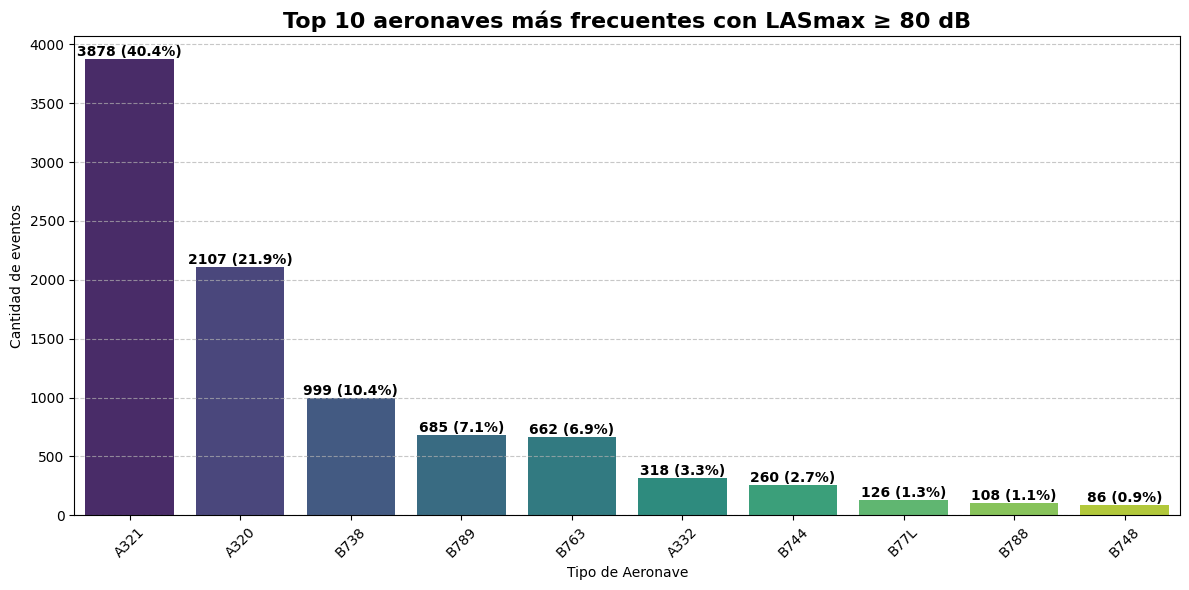

In [22]:
# Contar aeronaves más frecuentes en df_80_mas (Top 10)
conteo_aeronaves_top10 = df_80_mas['Aircraft Type'].value_counts().head(10)

# Total de eventos en df_80_mas
total_eventos = len(df_80_mas)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_aeronaves_top10.index, y=conteo_aeronaves_top10.values, palette='viridis')

# Títulos y etiquetas
plt.title('Top 10 aeronaves más frecuentes con LASmax ≥ 80 dB', fontsize=16, fontweight='bold')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar conteo + porcentaje encima de cada barra
for i, count in enumerate(conteo_aeronaves_top10.values):
    porcentaje = (count / total_eventos) * 100
    plt.text(i, count + 0.5, f'{count} ({porcentaje:.1f}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

C:\Users\claup\AppData\Local\Temp\ipykernel_21576\2590147674.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_horas.index, y=conteo_horas.values, palette='coolwarm')


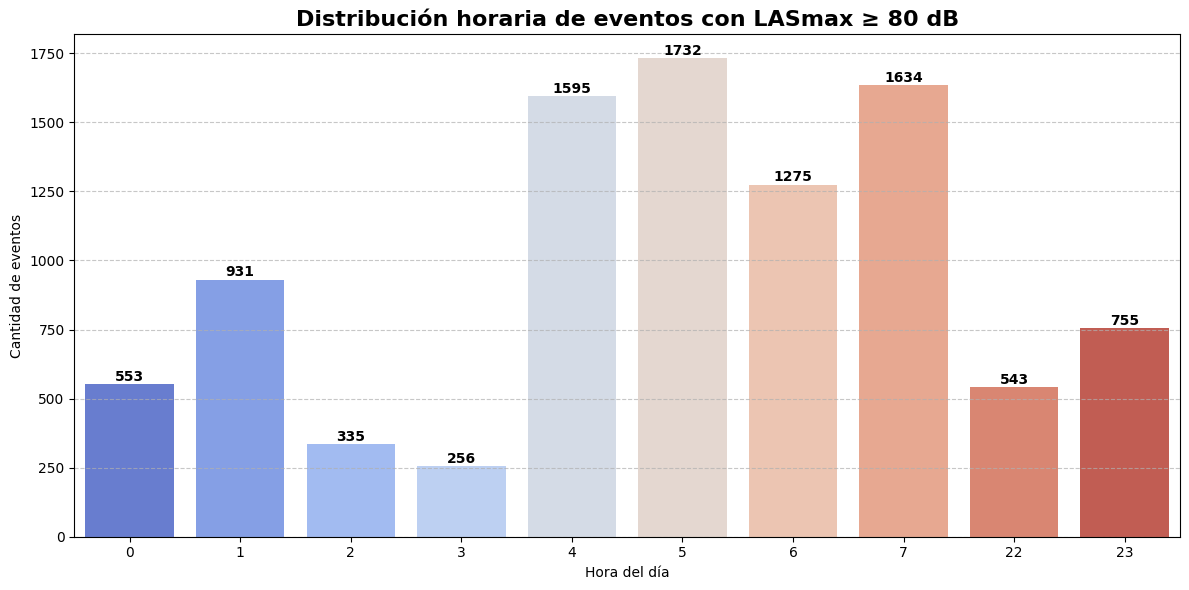

In [23]:
# Contar cantidad de eventos por hora
conteo_horas = df_80_mas['Hour'].value_counts().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_horas.index, y=conteo_horas.values, palette='coolwarm')

# Títulos y etiquetas
plt.title('Distribución horaria de eventos con LASmax ≥ 80 dB', fontsize=16, fontweight='bold')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar número de eventos encima de cada barra
for i, count in enumerate(conteo_horas.values):
    plt.text(i, count + 0.5, str(count), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

C:\Users\claup\AppData\Local\Temp\ipykernel_21576\2174116042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_aerolineas.index, y=conteo_aerolineas.values, palette='coolwarm')


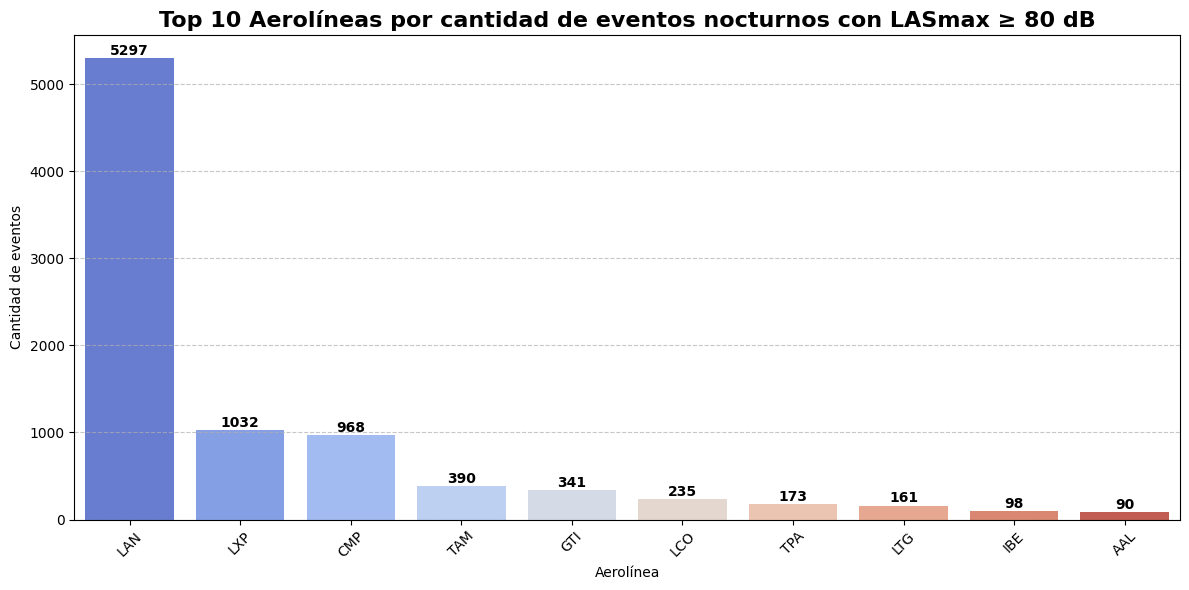

In [24]:
# Filtrar datos: solo eventos nocturnos donde LASmax >= 80
df_noche_80 = df_noche[df_noche['LASmax'] >= 80]

# Contar cantidad de eventos por aerolínea
conteo_aerolineas = df_noche_80['Airline'].value_counts().head(10)  # Top 10 aerolíneas más ruidosas

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_aerolineas.index, y=conteo_aerolineas.values, palette='coolwarm')

# Títulos y etiquetas
plt.title('Top 10 Aerolíneas por cantidad de eventos nocturnos con LASmax ≥ 80 dB', fontsize=16, fontweight='bold')
plt.xlabel('Aerolínea')
plt.ylabel('Cantidad de eventos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar número de eventos encima de cada barra
for i, count in enumerate(conteo_aerolineas.values):
    plt.text(i, count + 0.5, str(count), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

Se nos entregó un archivo de PMD (peso maximo despegue) los aviones fueron clasificados según su peso en 3 categorias

In [25]:
alto_list = ('B38M', 'B748', 'B744', 'A124', 'B77L', 'B742', 'B77W', 'B773', 'B772', 'MD11', 'A359', 'DC10', 'C17', 'C17A', 'B789', 'A330', 'A332', 'A333', 'B788', 'B764', 'IL76', 'B763', 'B767', 'A310', 'E3CF', 'A400', 'K35R', 'B752', 'A21N', 'A321', 'B722', 'B39M', 'B739', 'B737', 'B37M', 'P8', 'A320', 'B738', 'A19N', 'C130', 'A20N', 'A319', 'C30J', 'MD87', 'B734', 'B733', 'B735', 'E295', 'P3', 'B732', 'GL7T', 'GLF6', 'GLEX', 'E190', 'GLF5', 'RJ1H', 'GL5T', 'E120', 'RJ85', 'B462', 'GA6C', 'GA5C', 'C37', 'GLF4', 'FA8X', 'FA7X', 'C27J', 'DH8C', 'F28', 'FK28', 'F22', 'F18', 'CL60', 'E135', 'F2TH', 'CRJ2', 'C295', 'E35L', 'F900', 'CRJX')

medio_list = ('DA90', 'E145', 'CL', 'E550', 'C750', 'CL35', 'F16', 'AT43', 'F16C', 'CL30', 'HA4T', 'G280', 'GALX', 'CN35', 'D328', '680A', 'C680', 'G150', 'H25B', 'DC3', 'LJ60', 'ASTR', 'C650', 'C56X', 'LJ40', 'AS32', 'UH60', 'H60', 'LJ45', 'LJ75', 'E55P', 'LJ35', 'PC24', 'C560', 'A660', 'LJ31', 'BE20', 'C525', 'BE40', 'B350', 'SS2T', 'AT3T', 'AT8T', 'C25C', 'B300', 'C550', 'BE30', 'L410', 'C25B', 'D228', 'A139', 'DHC6', 'C501', 'TUCR', 'B200', 'SS2P', 'C25A', 'B412', 'B212', 'M18', 'A29', 'E314', 'BE9L', 'PC12', 'BE90', 'EC55', 'E50P', 'UH1', 'C25M', 'C90A', 'C90', 'BELL', 'PAY2', 'A109', 'PA31', 'C208', 'AS65', 'PAY1', 'C510', 'EC45')

bajo_list = ('C421', 'P212', 'BK17', 'TBM8', 'TBM9', 'B429', '500S', 'TBM7', 'A119', 'EC35', 'SF50', 'M600', 'B105', 'AS55', 'B407', 'C310', 'SR22', 'EC30', 'BE58', 'C303', 'AS35', 'AS50', 'PA34', 'C337', 'GA8', 'P68', 'P210', 'C210', 'B505', 'BE36', 'C206', 'PA32', 'PILL', 'B06', 'BE33', 'B04', 'C182', 'C82S', 'PA28', 'F5', 'ST75', 'T34P', 'C72R', 'P06T', 'P28A', 'C172', 'AC11', 'PA24', 'R44', 'R66', 'GB1', 'XA42', 'A1', 'E300', 'RV7', 'BL8', 'RV8', 'PA18', 'RV9', 'DA20', 'C150', 'PTS2', 'SIRA', 'GACA', 'CH7A', 'R22', 'NG5', 'AP22', 'AP32', 'AR6T', 'CH70', 'ULM', 'RANS', 'B206', 'C135', 'H500', 'AH6G', 'K35E', 'C212', 'BE99')


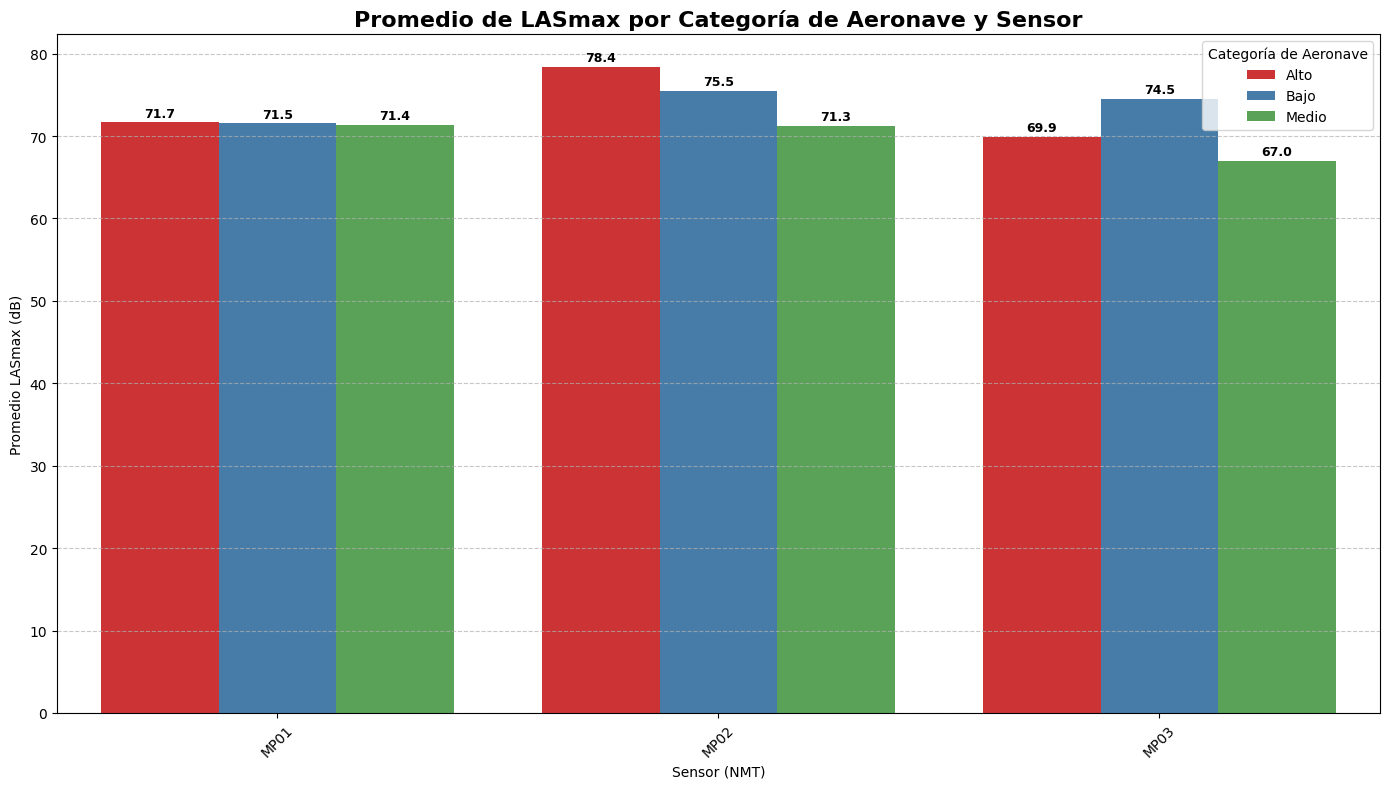

In [26]:
# Asegurar que la columna Aircraft_Category esté creada
def clasificar_aeronave(tipo):
    if tipo in alto_list:
        return 'Alto'
    elif tipo in medio_list:
        return 'Medio'
    elif tipo in bajo_list:
        return 'Bajo'
    else:
        return 'Desconocido'

df['Aircraft_Category'] = df['Aircraft Type'].apply(clasificar_aeronave)

# Filtrar solo categorías Alto, Medio y Bajo
df_filtrado = df[df['Aircraft_Category'].isin(['Alto', 'Medio', 'Bajo'])]

# Agrupar por Sensor (NMT) y Categoría
promedios_sensores = df_filtrado.groupby(['NMT', 'Aircraft_Category'])['LASmax'].mean().reset_index()

# Crear gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=promedios_sensores, x='NMT', y='LASmax', hue='Aircraft_Category', palette='Set1')

# Títulos y etiquetas
plt.title('Promedio de LASmax por Categoría de Aeronave y Sensor', fontsize=16, fontweight='bold')
plt.xlabel('Sensor (NMT)')
plt.ylabel('Promedio LASmax (dB)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Categoría de Aeronave')

# Agregar etiquetas numéricas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=2, fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

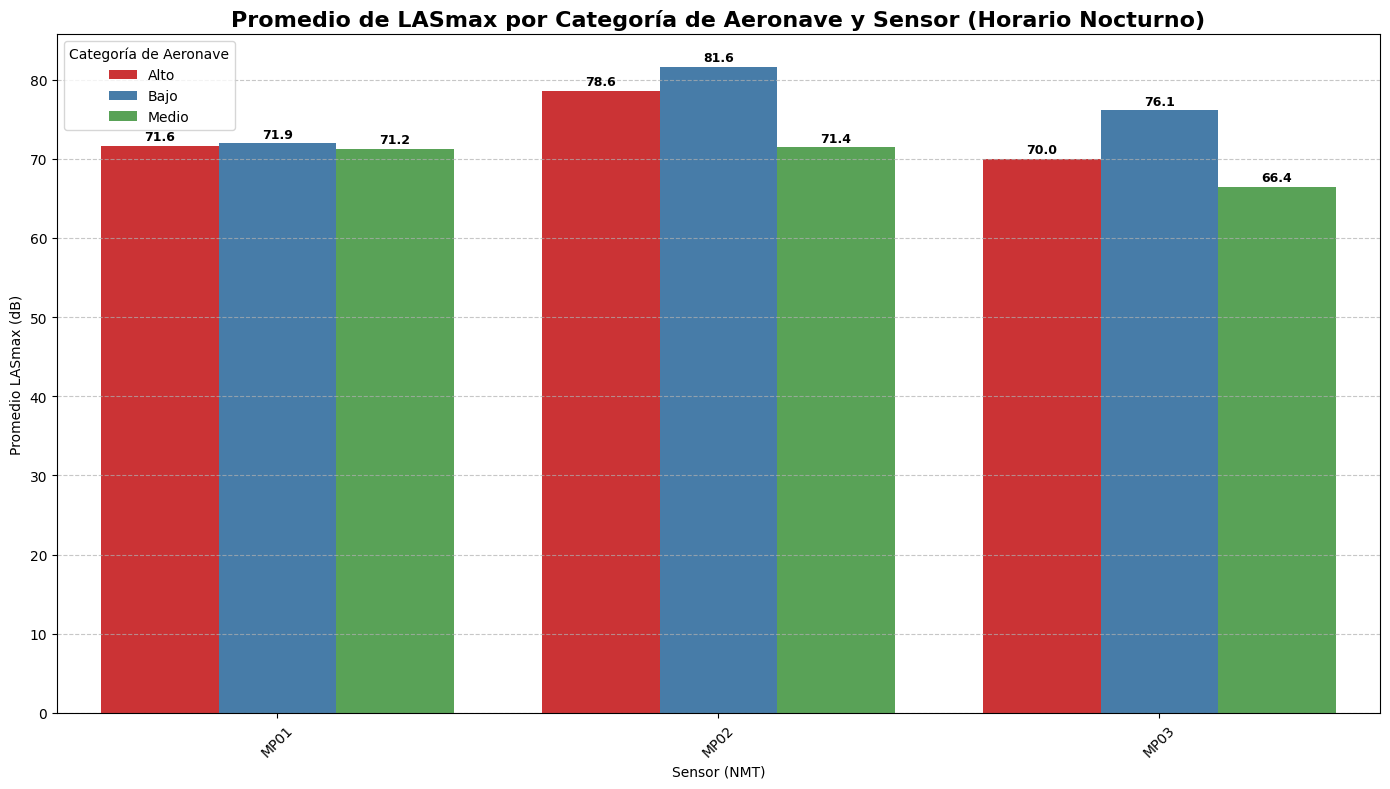

In [27]:
# Primero, asegurar que en df_noche también exista la categoría
def clasificar_aeronave(tipo):
    if tipo in alto_list:
        return 'Alto'
    elif tipo in medio_list:
        return 'Medio'
    elif tipo in bajo_list:
        return 'Bajo'
    else:
        return 'Desconocido'

# Aplicar clasificación sobre df_noche
df_noche['Aircraft_Category'] = df_noche['Aircraft Type'].apply(clasificar_aeronave)

# Filtrar categorías conocidas
df_noche_filtrado = df_noche[df_noche['Aircraft_Category'].isin(['Alto', 'Medio', 'Bajo'])]

# Agrupar por Sensor (NMT) y Categoría
promedios_noche = df_noche_filtrado.groupby(['NMT', 'Aircraft_Category'])['LASmax'].mean().reset_index()

# Crear gráfico
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=promedios_noche, x='NMT', y='LASmax', hue='Aircraft_Category', palette='Set1')

# Títulos y etiquetas
plt.title('Promedio de LASmax por Categoría de Aeronave y Sensor (Horario Nocturno)', fontsize=16, fontweight='bold')
plt.xlabel('Sensor (NMT)')
plt.ylabel('Promedio LASmax (dB)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Categoría de Aeronave')

# Agregar etiquetas numéricas en las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=2, fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

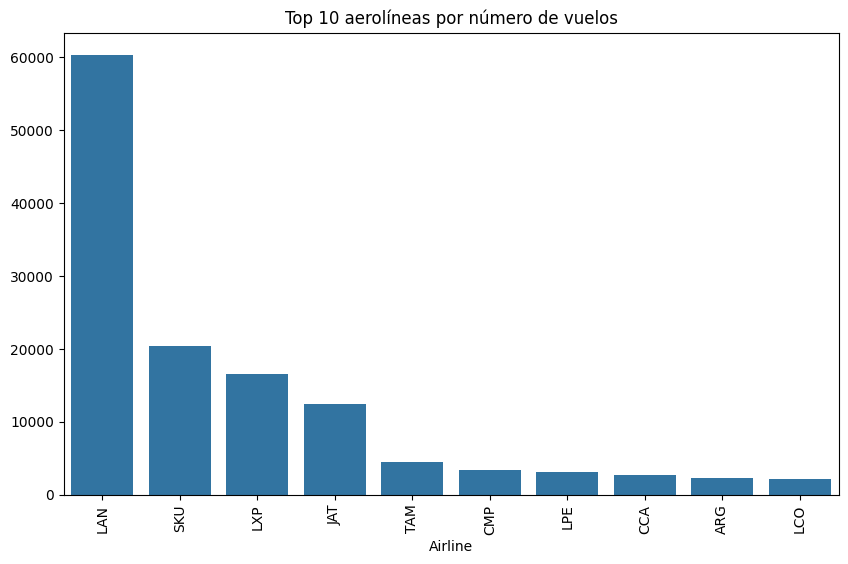

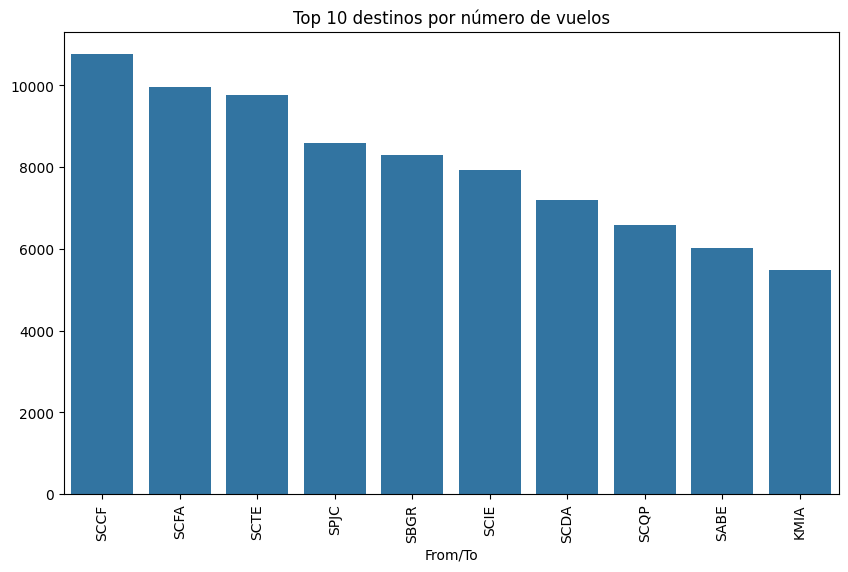

In [28]:
# Top aerolíneas por número de vuelos
top_airlines = df['Airline'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_airlines.index, y=top_airlines.values)
plt.xticks(rotation=90)
plt.title('Top 10 aerolíneas por número de vuelos')
plt.show()

# Top destinos por número de vuelos
top_destinations = df['From/To'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values)
plt.xticks(rotation=90)
plt.title('Top 10 destinos por número de vuelos')
plt.show()

In [29]:
# Definir las condiciones de filtrado
condicion_LASmax = df['LASmax'] > 80 
condicion_SEL = df['SEL'] > 85 
condicion_hora = (df['Hour'] >= 22) | (df['Hour'] < 7)  # Entre las 10 PM (22:00) y las 7 AM

# Filtrar las filas que cumplan ambas condiciones
df_filtrado = df[condicion_LASmax & condicion_SEL & condicion_hora]

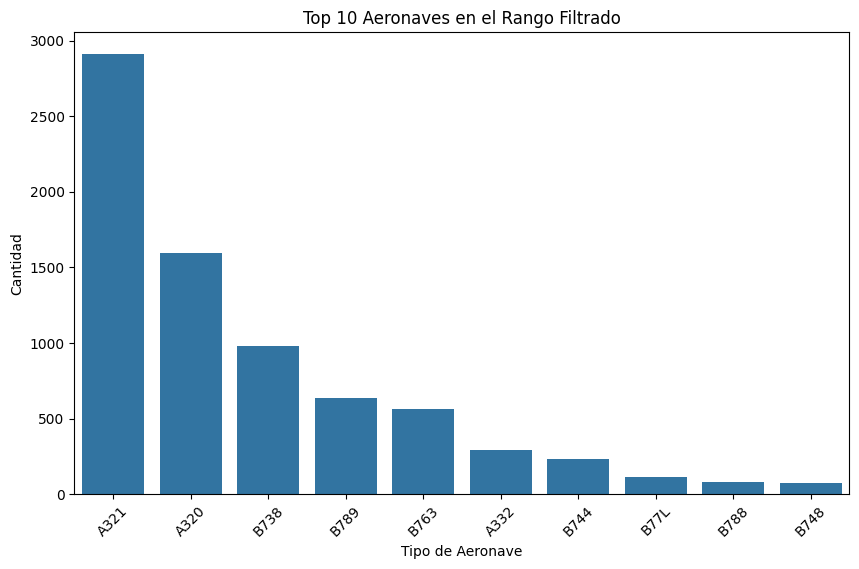

In [30]:
# Asegúrate de que 'Aircraft Type' sea la columna correcta en tu DataFrame
top_10_aeronaves = df_filtrado['Aircraft Type'].value_counts().head(10)

# Crear el gráfico de barras para el top 10 de aeronaves
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(x=top_10_aeronaves.index, y=top_10_aeronaves.values)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x si es necesario
plt.title('Top 10 Aeronaves en el Rango Filtrado')
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

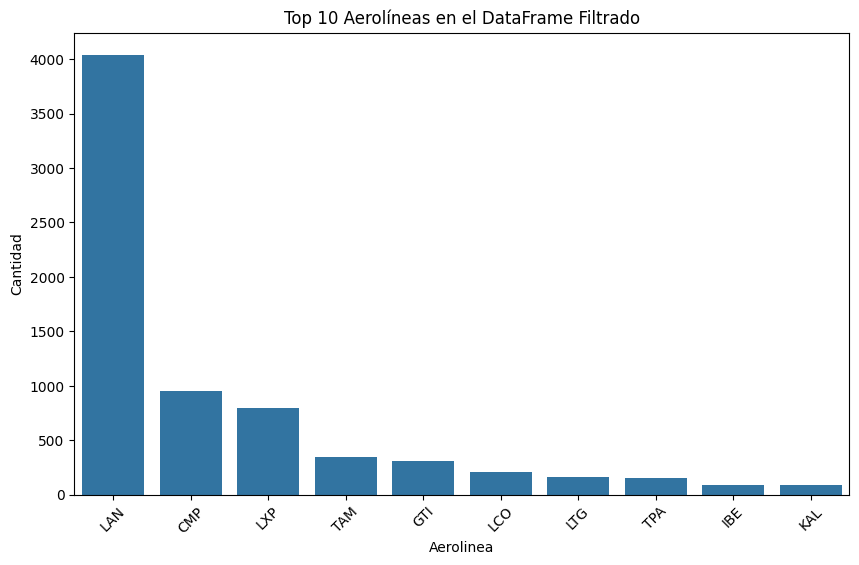

In [31]:
# Obtener las 10 aerolíneas más frecuentes
top_10_aerolineas = df_filtrado['Airline'].value_counts().head(10)

# Crear el gráfico de barras para las 10 aerolíneas más frecuentes
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.barplot(x=top_10_aerolineas.index, y=top_10_aerolineas.values)

# Personalizar el gráfico
plt.xticks(rotation=45)  # Rotar las etiquetas en el eje x si es necesario
plt.title('Top 10 Aerolíneas en el DataFrame Filtrado')
plt.xlabel('Aerolinea')
plt.ylabel('Cantidad')

# Mostrar el gráfico
plt.show()

In [32]:
# 1. Top 3 aeronaves que emiten más ruido (máximo LASmax)
top_3_aeronaves = df_filtrado.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False).head(3)

# 2. Top 3 From/To que generan más ruido (máximo LASmax)
top_3_from_to = df_filtrado.groupby('From/To')['LASmax'].max().sort_values(ascending=False).head(3)

# 3. Top 3 horas con mayor LASmax
top_3_horas = df_filtrado.groupby('Hour')['LASmax'].max().sort_values(ascending=False).head(3)
top_3_horas_formateadas = top_3_horas.index.astype(str) + ":00"

# Mostrar resultados

print("🔊 Top 3 Aeronaves que emiten más ruido:")
for aeronave, ruido in zip(top_3_aeronaves.index, top_3_aeronaves.values):
    print(f"- {aeronave}: {ruido:.2f} dB")

print("\n🌍 Top 3 From/To con mayor ruido:")
for ruta, ruido in zip(top_3_from_to.index, top_3_from_to.values):
    print(f"- {ruta}: {ruido:.2f} dB")

print("\n🕒 Top 3 Horas con mayor LASmax:")
for hora, ruido in zip(top_3_horas_formateadas, top_3_horas.values):
    print(f"- A las {hora}: {ruido:.2f} dB")

🔊 Top 3 Aeronaves que emiten más ruido:
- B744: 95.20 dB
- B722: 95.00 dB
- A21N: 94.70 dB

🌍 Top 3 From/To con mayor ruido:
- KMIA: 95.20 dB
- SUMU: 95.00 dB
- SCAR: 94.70 dB

🕒 Top 3 Horas con mayor LASmax:
- A las 22:00: 95.20 dB
- A las 23:00: 95.00 dB
- A las 2:00: 95.00 dB


In [33]:
# Aeronaves que tienen el lasmax máximo
aeronaves_top = ['B744', 'B722', 'A21N']

# Filtrar todas las filas donde Aircraft Type sea una de estas tres
df_top_aeronaves = df_filtrado[df_filtrado['Aircraft Type'].isin(aeronaves_top)]
df_top_aeronaves_completo = df[df['Aircraft Type'].isin(aeronaves_top)]


In [34]:
max_ruido_por_aeronave = df_filtrado.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False)

# Mostrar
print(max_ruido_por_aeronave.head(10))

Aircraft Type
B744    95.2
B722    95.0
A21N    94.7
B763    92.4
A20N    90.9
B748    90.8
A321    90.4
C17     89.8
A332    89.5
B77L    89.1
Name: LASmax, dtype: float64


In [36]:
# 1. Top 3 aeronaves que emiten más ruido (máximo LASmax)
top_3_aeronaves2 = df.groupby('Aircraft Type')['LASmax'].max().sort_values(ascending=False).head(3)

# 2. Top 3 From/To que generan más ruido (máximo LASmax)
top_3_from_to2 = df.groupby('From/To')['LASmax'].max().sort_values(ascending=False).head(3)

# 3. Top 3 horas con mayor LASmax
top_3_horas2 = df.groupby('Hour')['LASmax'].max().sort_values(ascending=False).head(3)
top_3_horas_formateadas2 = top_3_horas2.index.astype(str) + ":00"

# Mostrar resultados

print("🔊 Top 3 Aeronaves que emiten más ruido:")
for aeronave, ruido in zip(top_3_aeronaves2.index, top_3_aeronaves2.values):
    print(f"- {aeronave}: {ruido:.2f} dB")

print("\n🌍 Top 3 From/To con mayor ruido:")
for ruta, ruido in zip(top_3_from_to2.index, top_3_from_to2.values):
    print(f"- {ruta}: {ruido:.2f} dB")

print("\n🕒 Top 3 Horas con mayor LASmax:")
for hora, ruido in zip(top_3_horas_formateadas2, top_3_horas2.values):
    print(f"- A las {hora}: {ruido:.2f} dB")

🔊 Top 3 Aeronaves que emiten más ruido:
- MONO: 117.50 dB
- BE10: 111.50 dB
- A21N: 102.20 dB

🌍 Top 3 From/To con mayor ruido:
- SCNK: 117.50 dB
- SCDA: 111.50 dB
- SCIE: 102.20 dB

🕒 Top 3 Horas con mayor LASmax:
- A las 12:00: 117.50 dB
- A las 15:00: 111.50 dB
- A las 11:00: 102.20 dB
